In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [12]:
df=pd.read_csv("ipl.csv")

In [13]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [14]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [15]:
df.shape

(76014, 15)

In [18]:
# remove columns
col=['mid','batsman','bowler','striker','non-striker']
df.drop(col,axis=1,inplace=True)

In [19]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [20]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [22]:
teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [23]:
df=df[(df['bat_team'].isin(teams))&df["bowl_team"].isin(teams)]

In [24]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [26]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [28]:
df["bowl_team"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [27]:
df.shape

(53811, 10)

In [29]:
# require atleast 5 over of data to be entered in webapp
df=df[df["overs"]>=5.0]

In [30]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [31]:
df.shape

(40108, 10)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   venue           40108 non-null  object 
 2   bat_team        40108 non-null  object 
 3   bowl_team       40108 non-null  object 
 4   runs            40108 non-null  int64  
 5   wickets         40108 non-null  int64  
 6   overs           40108 non-null  float64
 7   runs_last_5     40108 non-null  int64  
 8   wickets_last_5  40108 non-null  int64  
 9   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.4+ MB


In [34]:
df['date']=df["date"].apply(lambda x:datetime.strptime(x,"%Y-%m-%d"))

C:\Users\gurdit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   venue           40108 non-null  object        
 2   bat_team        40108 non-null  object        
 3   bowl_team       40108 non-null  object        
 4   runs            40108 non-null  int64         
 5   wickets         40108 non-null  int64         
 6   overs           40108 non-null  float64       
 7   runs_last_5     40108 non-null  int64         
 8   wickets_last_5  40108 non-null  int64         
 9   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 3.4+ MB


In [36]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [37]:
# one hot encoding

In [38]:
encode_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [39]:
encode_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
encode_df1=pd.get_dummies(data=encode_df,columns=["venue"])

In [41]:
encode_df1.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,"venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#rearranging columns
encode_df1=encode_df1[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       "venue_St George's Park", 'venue_Subrata Roy Sahara Stadium',
       'venue_SuperSport Park', 'venue_Wankhede Stadium','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [53]:
encode_df1.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'ven

In [58]:
X_train = encode_df1.drop(labels='total', axis=1)[encode_df1['date'].dt.year <= 2016]
X_test = encode_df1.drop(labels='total', axis=1)[encode_df1['date'].dt.year >= 2017]

In [60]:
y_train = encode_df1[encode_df1['date'].dt.year <= 2016]['total'].values
y_test = encode_df1[encode_df1['date'].dt.year >= 2017]['total'].values

In [61]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [63]:
#Linear Regression

In [67]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [70]:
encode_df1.corr()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium,runs,wickets,overs,runs_last_5,wickets_last_5,total
bat_team_Chennai Super Kings,1.000000,-0.143484,-0.167659,-0.146546,-0.174583,-0.143970,-0.154415,-0.125735,-0.143286,0.029800,...,0.009580,-0.019286,0.054616,-0.095159,0.032423,-0.064549,0.001623,0.052292,-0.059572,0.075212
bat_team_Delhi Daredevils,-0.143484,1.000000,-0.147077,-0.128557,-0.153152,-0.126296,-0.135459,-0.110300,-0.008564,-0.151157,...,-0.041872,-0.016918,0.010939,-0.099172,-0.029636,0.085182,-0.004718,-0.079642,0.035062,-0.097196
bat_team_Kings XI Punjab,-0.167659,-0.147077,1.000000,-0.150217,-0.178955,-0.147575,-0.158282,-0.128884,0.018587,-0.013228,...,-0.048927,-0.019769,-0.000751,-0.014092,0.018967,0.042243,0.000633,0.017720,0.052588,0.015382
bat_team_Kolkata Knight Riders,-0.146546,-0.128557,-0.150217,1.000000,-0.156421,-0.128992,-0.138351,-0.112654,-0.036634,0.035797,...,0.018089,0.131603,0.010884,-0.014227,-0.014791,0.005088,-0.006995,-0.033639,0.017669,-0.049526
bat_team_Mumbai Indians,-0.174583,-0.153152,-0.178955,-0.156421,1.000000,-0.153670,-0.164819,-0.134207,0.088029,0.081157,...,0.109167,-0.020585,-0.004426,0.347411,-0.006143,-0.014186,0.006518,0.023195,-0.022077,0.028980
bat_team_Rajasthan Royals,-0.143970,-0.126296,-0.147575,-0.128992,-0.153670,1.000000,-0.135918,-0.110674,0.059394,-0.010296,...,-0.042014,-0.016976,-0.045939,-0.075568,0.009961,-0.029852,-0.001561,0.001150,0.018746,-0.029065
bat_team_Royal Challengers Bangalore,-0.154415,-0.135459,-0.158282,-0.138351,-0.164819,-0.135918,1.000000,-0.118703,0.048464,0.010789,...,0.016002,-0.018207,0.005546,-0.040772,-0.025454,0.008033,-0.000618,0.001340,-0.015595,0.010391
bat_team_Sunrisers Hyderabad,-0.125735,-0.110300,-0.128884,-0.112654,-0.134207,-0.110674,-0.118703,1.000000,-0.032755,0.002171,...,-0.036693,-0.014826,-0.040121,-0.053205,0.012936,-0.031969,0.004466,0.007678,-0.025747,0.035569
bowl_team_Chennai Super Kings,-0.143286,-0.008564,0.018587,-0.036634,0.088029,0.059394,0.048464,-0.032755,1.000000,-0.150948,...,0.019428,-0.016895,-0.045721,0.070707,-0.002223,0.010854,0.001048,-0.002524,0.006884,-0.003715
bowl_team_Delhi Daredevils,0.029800,-0.151157,-0.013228,0.035797,0.081157,-0.010296,0.010789,0.002171,-0.150948,1.000000,...,0.006146,0.111926,-0.003235,-0.023640,-0.012163,0.020054,0.001172,-0.013297,0.018997,-0.002952


In [74]:
prediction=reg.predict(X_test)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.435454794728455
MSE: 276.7459659445269
RMSE: 16.6356835129948


In [76]:
# Ridge Regression

In [77]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46737e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.50949e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41828e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\lin

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [78]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-338.35470543710437


In [82]:
prediction=ridge_regressor.predict(X_test)

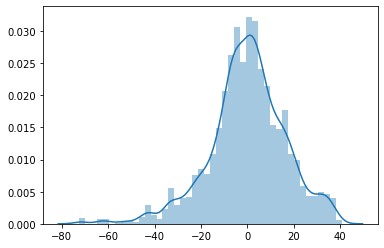

In [83]:
sns.distplot(y_test-prediction)

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.396279737893181
MSE: 274.40844696319954
RMSE: 16.565278354534207


In [85]:
#LASSO

In [86]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4299019.351330743, tolerance: 2529.955696594561
  positive)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4149487.2733483687, tolerance: 2547.0380710286604
  positive)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4349217.759997923, tolerance: 2667.8126904366463
  positive)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [87]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.8221491459935


In [121]:
prediction=lasso_regressor.predict(X_test)

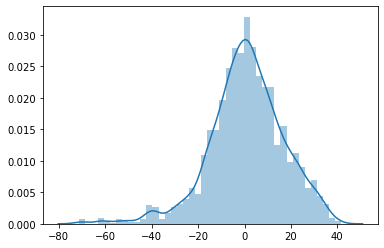

In [122]:
sns.distplot(y_test-prediction)

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759


In [124]:
r2_score(y_test,prediction)

0.7410539138954501

In [ ]:
filename = 'first-innings-score-lasso-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [ ]:
#RandomForrestRegressor

In [113]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [114]:
rf=RandomForestRegressor()

In [115]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))